In [31]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools
from  scipy.spatial.distance import cdist
from sklearn.metrics import zero_one_loss
%matplotlib inline

## question 21 

In [32]:
### Kernel function generators
def linear_kernel(X1, X2):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
    Returns:
        matrix of size n1xn2, with x1_i^T x2_j in position i,j
    """
    return np.dot(X1,np.transpose(X2))
 
def RBF_kernel(X1,X2,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """
    a=cdist(X1,X2,'sqeuclidean')*(-1)/(2*sigma**2)
    return np.exp(a)
    #TODO


def polynomial_kernel(X1, X2, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <x1_i,x2_j>)^degree in position i,j
    """
    #TODO
    return np.power((offset+np.dot(X1,np.transpose(X2))), degree)



# question 22 

In [33]:
x=np.array([-4,-1,0,2]).reshape(4,1)
linear_kernel(x,x)

array([[16,  4,  0, -8],
       [ 4,  1,  0, -2],
       [ 0,  0,  0,  0],
       [-8, -2,  0,  4]])

## question 23 

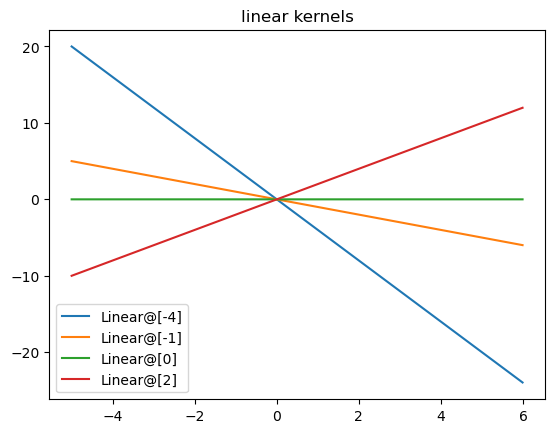

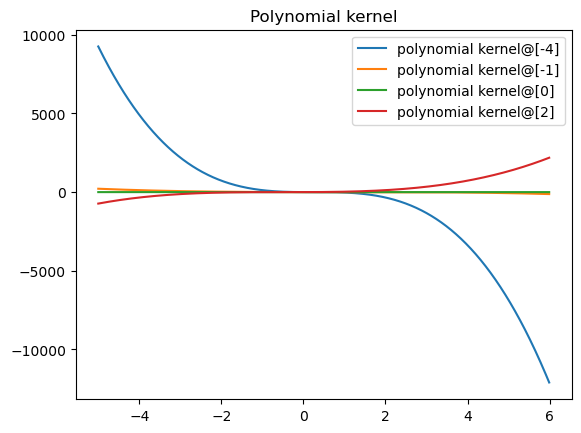

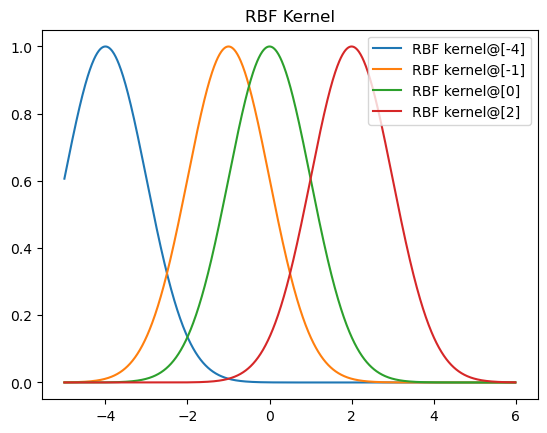

In [34]:
# PLot kernel machine functions

plot_step = .01
xpts = np.arange(-5.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.title("linear kernels")
plt.show() 


# PLot kernel machine functions


y = polynomial_kernel(prototypes, xpts,1,3) 
for i in range(len(prototypes)):
    label = "polynomial kernel@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.title("Polynomial kernel")
plt.show() 



y = RBF_kernel(prototypes, xpts, 1) 
for i in range(len(prototypes)):
    label = "RBF kernel@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.title("RBF Kernel")
plt.show() 
 

 

In [35]:
class Kernel_Machine(object):
    def __init__(self, kernel, training_points, weights):
        """
        Args:
            kernel(X1,X2) - a function return the cross-kernel matrix between rows of X1 and rows of X2 for kernel k
            training_points - an nxd matrix with rows x_1,..., x_n
            weights - a vector of length n with entries alpha_1,...,alpha_n
        """

        self.kernel = kernel
        self.training_points = training_points
        self.weights = weights

    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R alpha_i k(x_j, mu_i)
        """
        # TODO
        k_t=self.kernel(self.training_points,X)
        return np.dot(k_t.T, self.weights)

## question 24 

[[0.48230437]]


Text(0.5, 1.0, 'example prediction for polynomial kernel')

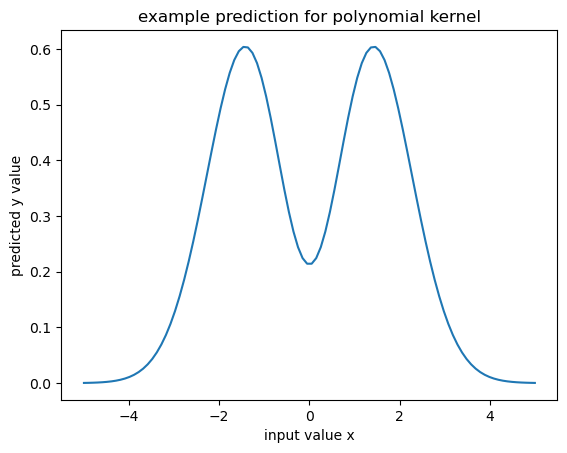

In [36]:
prototypes = np.array([-1,0,1]).reshape(-1,1)
RBF=RBF_kernel(prototypes, prototypes, sigma=1)
weights=np.array([1,-1,1]).reshape(-1,1)
k = functools.partial(RBF_kernel, sigma=1)
poly_kernel=Kernel_Machine(kernel=k,weights=weights,training_points=prototypes)
x=np.array([2]).reshape(-1,1)
print(poly_kernel.predict(x))
x=np.linspace(-5,5,100)
out=[]
for i in x:
    out.append(poly_kernel.predict(np.array(i).reshape(1,1))[0])
out=np.array(out)
y=range(100)
plt.plot(x,out[y]) 
plt.xlabel("input value x")
plt.ylabel("predicted y value")
plt.title("example prediction for polynomial kernel")


Load train & test data; Convert to column vectors so it generalizes well to data in higher dimensions.

## question 25

Text(0.5, 1.0, 'training data ')

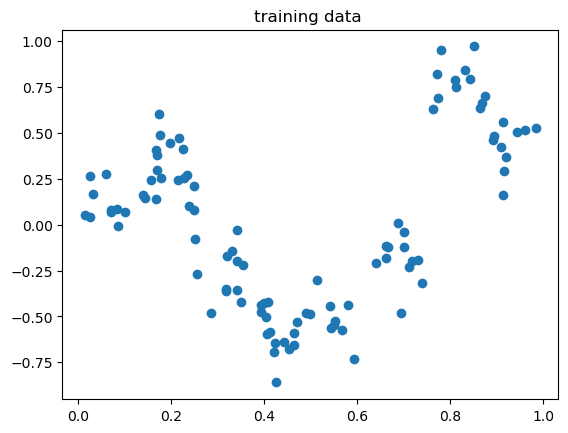

In [37]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

plt.scatter(x_train, y_train)
plt.title("training data ")

## question 26 

In [38]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    # TODO
    i=np.identity(X.shape[0])*l2reg
    k=kernel(X,X)
    alpha=np.dot((np.linalg.inv(i+k)),y)
    return Kernel_Machine(kernel, X, alpha)

## Question 27

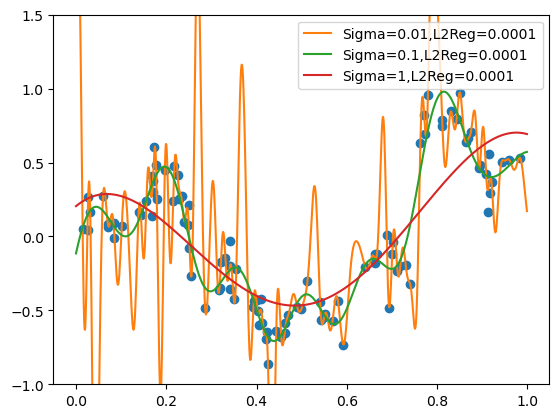

In [39]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

## question 28

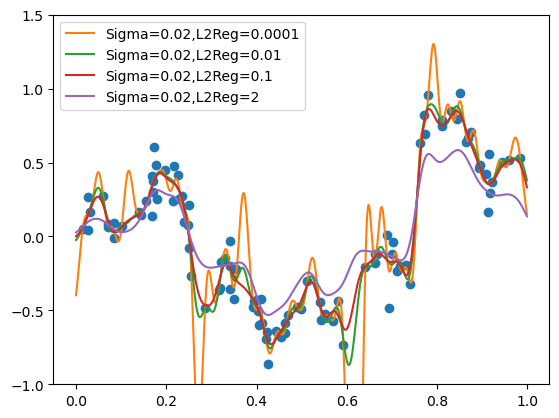

In [40]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

## question 29

In [41]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return(((self.predict(X)-y)**2).mean()) 

In [42]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [43]:
param_grid = [{'kernel': ['RBF'],'sigma':[.1,1,10], 'l2reg': np.exp2(-np.arange(-5,5,1))},
              {'kernel':['polynomial'],'offset':[-1,0,1], 'degree':[2,3,4],'l2reg':[10, .1, .01] },
              {'kernel':['linear'],'l2reg': [10,1,.01]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False),
                    return_train_score=True
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KernelRidgeRegression(),
             param_grid=[{'kernel': ['RBF'],
                          'l2reg': array([32.    , 16.    ,  8.    ,  4.    ,  2.    ,  1.    ,  0.5   ,
        0.25  ,  0.125 ,  0.0625]),
                          'sigma': [0.1, 1, 10]},
                         {'degree': [2, 3, 4], 'kernel': ['polynomial'],
                          'l2reg': [10, 0.1, 0.01], 'offset': [-1, 0, 1]},
                         {'kernel': ['linear'], 'l2reg': [10, 1, 0.01]}],
             return_train_score=True,
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [44]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_to_show=df_toshow.sort_values(by=["mean_test_score"])

In [45]:
df_to_show[df_to_show['param_kernel']=="RBF"]

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
27,-,RBF,0.0625,-,0.1,0.021270,0.023245
24,-,RBF,0.1250,-,0.1,0.022885,0.024608
21,-,RBF,0.2500,-,0.1,0.024845,0.026226
18,-,RBF,0.5000,-,0.1,0.026609,0.028110
15,-,RBF,1.0000,-,0.1,0.027562,0.030319
...,...,...,...,...,...,...,...
14,-,RBF,2.0000,-,10,0.167174,0.209937
11,-,RBF,4.0000,-,10,0.167614,0.210387
8,-,RBF,8.0000,-,10,0.167840,0.210621
5,-,RBF,16.0000,-,10,0.167949,0.210743


In [46]:
df_to_show[df_to_show['param_kernel']=="linear"]

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
58,-,linear,1.00,-,-,0.164540,0.206506
59,-,linear,0.01,-,-,0.164569,0.206501
57,-,linear,10.00,-,-,0.164591,0.206780


In [47]:
df_to_show[df_to_show['param_kernel']=="polynomial"]

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
54,4,polynomial,0.01,-1,-,0.043454,0.060135
56,4,polynomial,0.01,1,-,0.060262,0.088844
33,2,polynomial,0.10,-1,-,0.065554,0.098913
38,2,polynomial,0.01,1,-,0.066532,0.097785
36,2,polynomial,0.01,-1,-,0.066915,0.097706
...,...,...,...,...,...,...,...
37,2,polynomial,0.01,0,-,0.151737,0.192542
31,2,polynomial,10.00,0,-,0.153268,0.195033
51,4,polynomial,0.10,-1,-,0.188090,0.148359
30,2,polynomial,10.00,-1,-,0.202746,0.239150


## question 30

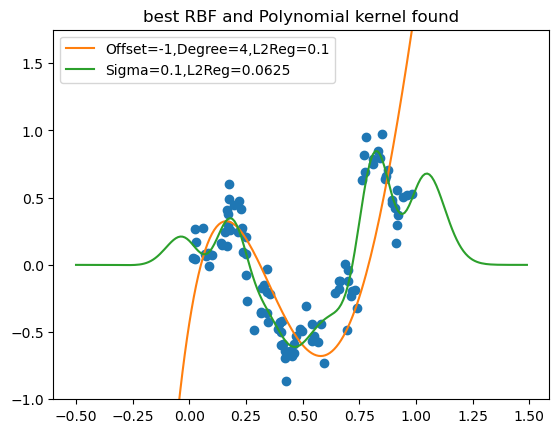

In [48]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= -1
degree = 4
l2reg = 0.1000
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = 0.1
l2reg= 0.0625
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.title("best RBF and Polynomial kernel found")
plt.show()

# Kernel SVM optional problem

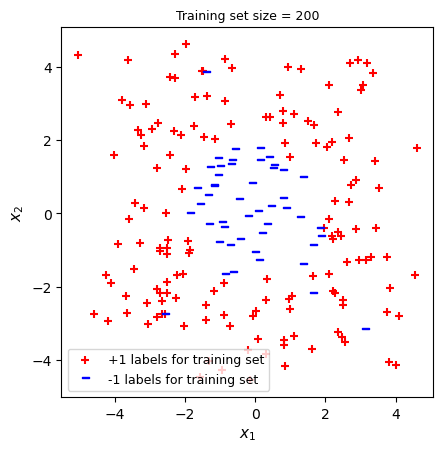

In [49]:
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

In [73]:
from collections import Counter
from random import shuffle
from random import seed 
import os
import numpy as np
import matplotlib.pyplot as plt

## question 33

In [74]:
def train_soft_svm(X_train, y_train,kernel,epochs=100, regularization_coef=.05):
    ## set up
    W_t=np.zeros((X_train.shape[0],1)) ## which represnts 1/s_t our independent output
    seed(15100873) ## set random seed 
    curent_epoch=0 ##  epoch counter
    data=list(zip(X_train, y_train)) ## zip data togther to make easy to loop through
    k=kernel(X_train, X_train)
    t=1
    s_t=1 ## intiilize s_5
    while(curent_epoch<=epochs): 
        shuffle(data)
        for x_i,y_i in data:
            x_i=x_i.reshape(-1,1)
            t+=1
            eta_t=(1)/(regularization_coef*t)
            a=1-eta_t*regularization_coef
            s_t=(a)*s_t ## s_t updates
            k_t=kernel(X_train,x_i.T)
            pred=np.dot(k_t.T, W_t)
            margin=y_i*pred  

            if margin<1:
                scale=(1/s_t)*eta_t*y_i
                W_t=np.add(W_t,scale*(np.dot( k.T,y_train)))
 
        curent_epoch+=1

    return Kernel_Machine(kernel, X_train, W_t*s_t)


from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class soft_svm(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_soft_svm(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return(((self.predict(X)-y)**2).mean()) 

## question 34

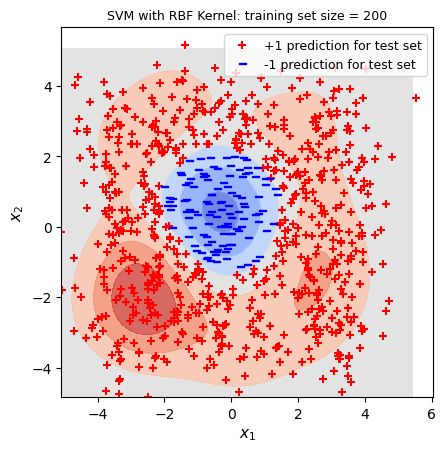

array([-1.,  1.])

In [75]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
 
# sigma=1
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_soft_svm(x_train, y_train, k)
x_train.shape
#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[[i for i in range(len(x_test)) if ~np.array(yplus.mask)[i]]]

yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[[i for i in range(len(x_test)) if ~np.array(yminus.mask)[i]]]
# #plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

np.unique(y_train)
np.unique(y_test)

In [76]:
param_grid = [{'kernel': ['RBF'],'sigma':[.1,1,10], 'l2reg': np.exp2(-np.arange(-5,5,1))},
              {'kernel':['polynomial'],'offset':[-1,0,1], 'degree':[2,3,4],'l2reg':[10, .1, .01] },
              {'kernel':['linear'],'l2reg': [10,1,.01]}]
soft_svm_regression_estimator = soft_svm()
grid = GridSearchCV(soft_svm_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(sklearn.metrics.hinge_loss,greater_is_better = False),
                    return_train_score=True
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=soft_svm(),
             param_grid=[{'kernel': ['RBF'],
                          'l2reg': array([32.    , 16.    ,  8.    ,  4.    ,  2.    ,  1.    ,  0.5   ,
        0.25  ,  0.125 ,  0.0625]),
                          'sigma': [0.1, 1, 10]},
                         {'degree': [2, 3, 4], 'kernel': ['polynomial'],
                          'l2reg': [10, 0.1, 0.01], 'offset': [-1, 0, 1]},
                         {'kernel': ['linear'], 'l2reg': [10, 1, 0.01]}],
             return_train_score=True,
             scoring=make_scorer(hinge_loss, greater_is_better=False))

In [77]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow=df_toshow.sort_values(by=["mean_test_score"])




In [78]:
df_toshow[df_toshow["param_kernel"]=="RBF"]

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
1,-,RBF,32.0000,-,1,0.437462,0.499153
4,-,RBF,16.0000,-,1,0.452301,0.521035
7,-,RBF,8.0000,-,1,0.479484,0.561120
10,-,RBF,4.0000,-,1,0.525629,0.629168
13,-,RBF,2.0000,-,1,0.596884,0.731463
...,...,...,...,...,...,...,...
17,-,RBF,1.0000,-,10,116.100654,101.255644
29,-,RBF,0.0625,-,10,515.802589,543.305024
20,-,RBF,0.5000,-,10,515.802589,543.305024
23,-,RBF,0.2500,-,10,515.802589,543.305024


In [79]:
df_toshow[df_toshow["param_kernel"]=="linear"]

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
57,-,linear,10.00,-,-,40949.318613,52492.429240
58,-,linear,1.00,-,-,41447.560971,53131.121151
59,-,linear,0.01,-,-,42051.042639,53904.718285


In [80]:
df_toshow[df_toshow["param_kernel"]=="polynomial"]

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
48,4,polynomial,10.00,-1,-,9.998396e-01,9.998308e-01
50,4,polynomial,10.00,1,-,9.998561e-01,9.998449e-01
49,4,polynomial,10.00,0,-,9.998659e-01,9.998571e-01
47,3,polynomial,0.01,1,-,9.999999e-01,9.999999e-01
44,3,polynomial,0.10,1,-,9.999999e-01,9.999999e-01
...,...,...,...,...,...,...,...
55,4,polynomial,0.01,0,-,9.126511e+11,9.094719e+11
53,4,polynomial,0.10,1,-,9.386350e+11,9.412107e+11
56,4,polynomial,0.01,1,-,9.386350e+11,9.412107e+11
51,4,polynomial,0.10,-1,-,9.475295e+11,9.398578e+11


## question 35

40949.31861303681


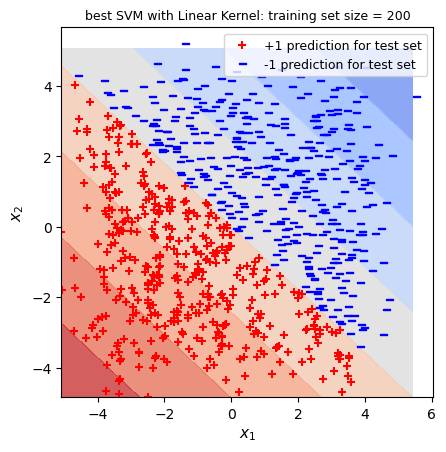

array([-1.,  1.])

In [81]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
kernel=df_toshow[df_toshow["param_kernel"]=="linear"]["param_kernel"].iloc[0]
l2=df_toshow[df_toshow["param_kernel"]=="linear"]["param_l2reg"].iloc[0]
print(df_toshow[df_toshow["param_kernel"]=="linear"]["mean_test_score"].iloc[0])
f=soft_svm(kernel=kernel, l2reg=l2)
f.fit(x_train, y_train)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[[i for i in range(len(x_test)) if ~np.array(yplus.mask)[i]]]

yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[[i for i in range(len(x_test)) if ~np.array(yminus.mask)[i]]]
# #plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('best SVM with Linear Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

np.unique(y_train)
np.unique(y_test)

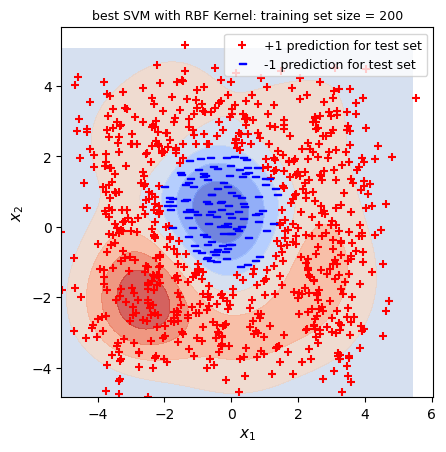

In [82]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
kernel=df_toshow[df_toshow["param_kernel"]=="RBF"]["param_kernel"].iloc[0]
l2=df_toshow[df_toshow["param_kernel"]=="RBF"]["param_l2reg"].iloc[0]
sigma=df_toshow[df_toshow["param_kernel"]=="RBF"]["param_sigma"].iloc[0]

# print(df_toshow[df_toshow["param_kernel"]=="RBF"]["mean_test_score"].iloc[0])
f=soft_svm(kernel=kernel, sigma=sigma, l2reg=l2)
f.fit(x_train, y_train)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[[i for i in range(len(x_test)) if ~np.array(yplus.mask)[i]]]

yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[[i for i in range(len(x_test)) if ~np.array(yminus.mask)[i]]]
# #plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('best SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

polynomial 10.0 -1 4


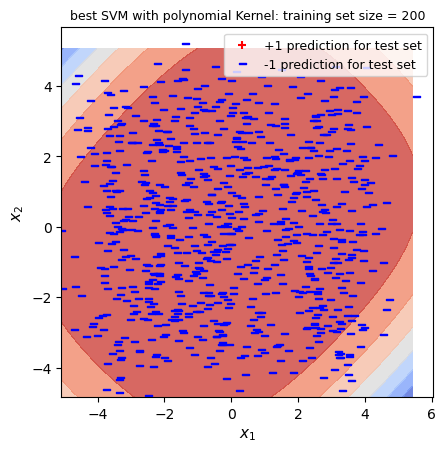

In [83]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
kernel=df_toshow[df_toshow["param_kernel"]=="polynomial"]["param_kernel"].iloc[0]
l2=df_toshow[df_toshow["param_kernel"]=="polynomial"]["param_l2reg"].iloc[0]
offset=df_toshow[df_toshow["param_kernel"]=="polynomial"]["param_offset"].iloc[0]
degree=df_toshow[df_toshow["param_kernel"]=="polynomial"]["param_degree"].iloc[0]
f=soft_svm(kernel=kernel, l2reg=l2, offset=offset, degree=degree)
f.fit(x_train, y_train)
print(kernel,l2, offset,degree)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[[i for i in range(len(x_test)) if ~np.array(yplus.mask)[i]]]

yminus = np.ma.masked_where(y_bar>0, y_bar)

xminus = x_test[[i for i in range(len(x_test)) if ~np.array(yminus.mask)]]
# #plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('best SVM with polynomial Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()
